# Comprehensive Data Preprocessing and Analysis Guide

## Load the Data and Initial Exploration

In [1]:
import pandas as pd

# Load the dataset
file_path = 'census+income/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
data = pd.read_csv(file_path, names=column_names)

# Display the first few rows
print(data.head())


   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

## Data Cleaning and Preprocessing

### Drop Redundant Column

In [2]:

data_cleaned = data.drop('education', axis=1)


### Encode Categorical Variables

In [3]:

data_encoded = pd.get_dummies(data_cleaned, columns=[
    'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex'
])


### Handle High-Cardinality Features

In [4]:

data_encoded['native_country'] = data_encoded['native_country'].apply(
    lambda x: "Other" if data_encoded['native_country'].value_counts()[x] < 100 else x
)
data_final = pd.get_dummies(data_encoded, columns=['native_country'])


## Data Analysis

### Correlation Analysis

C:\Users\sapsh\AppData\Local\Temp\ipykernel_23056\284034391.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_final.corr()


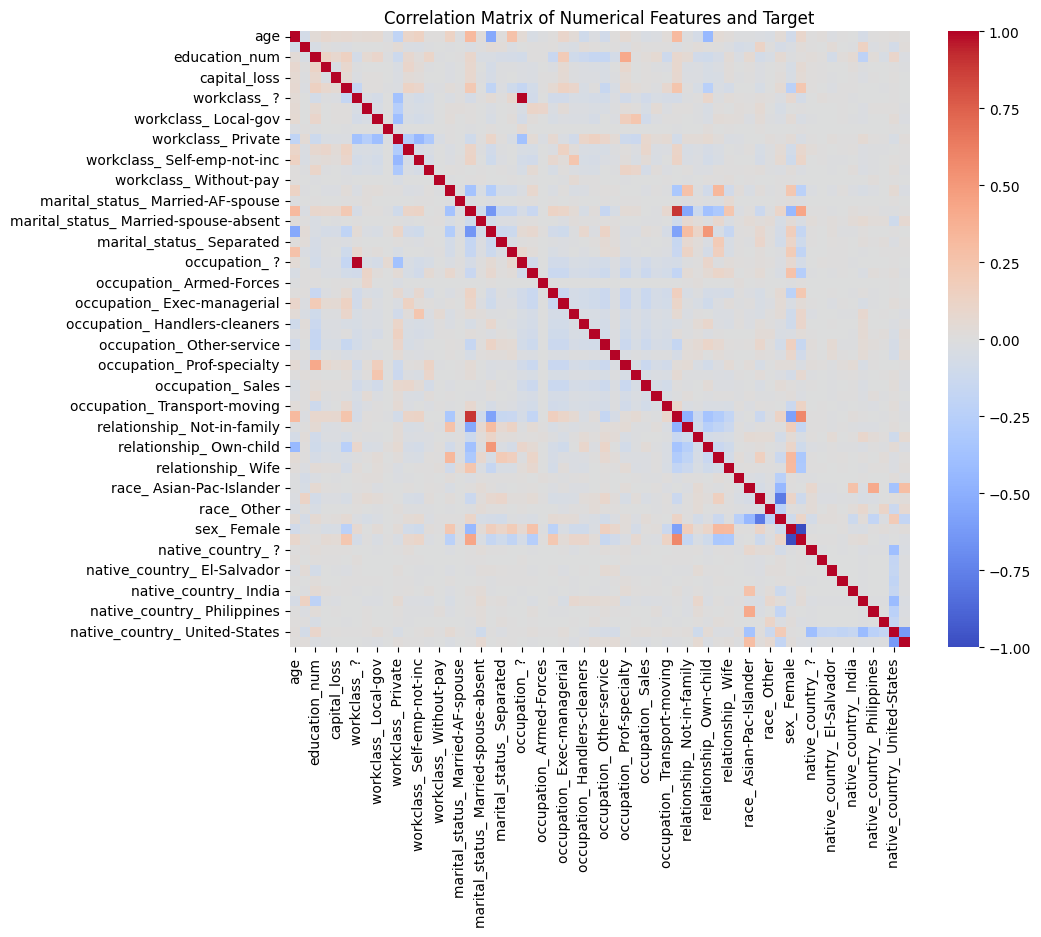

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features and Target")
plt.show()


### Outlier Detection

In [6]:

numerical_stats = data_final.describe()
print(numerical_stats[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])


                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## Further Preprocessing

### Log Transformation

In [7]:

import numpy as np

data_final['capital_gain_log'] = np.log(data_final['capital_gain'] + 1)
data_final['capital_loss_log'] = np.log(data_final['capital_loss'] + 1)
data_final.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

### Feature Scaling

In [8]:

from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'fnlwgt', 'education_num', 'hours_per_week', 'capital_gain_log', 'capital_loss_log']
scaler = StandardScaler()
data_final[numerical_columns] = scaler.fit_transform(data_final[numerical_columns])


### Conclusion and Next Steps
After preprocessing, scaling, and conducting an exploratory analysis, your dataset is ready for modeling. The next steps include selecting a classification model, training the model on your preprocessed dataset, and then evaluating its performance.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preparing the features (X) and target (y)
X = data_final.drop('income', axis=1)
y = data_final['income']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.861200675571933,
 '              precision    recall  f1-score   support\n\n       <=50K       0.89      0.93      0.91      4942\n        >50K       0.75      0.64      0.69      1571\n\n    accuracy                           0.86      6513\n   macro avg       0.82      0.79      0.80      6513\nweighted avg       0.86      0.86      0.86      6513\n')

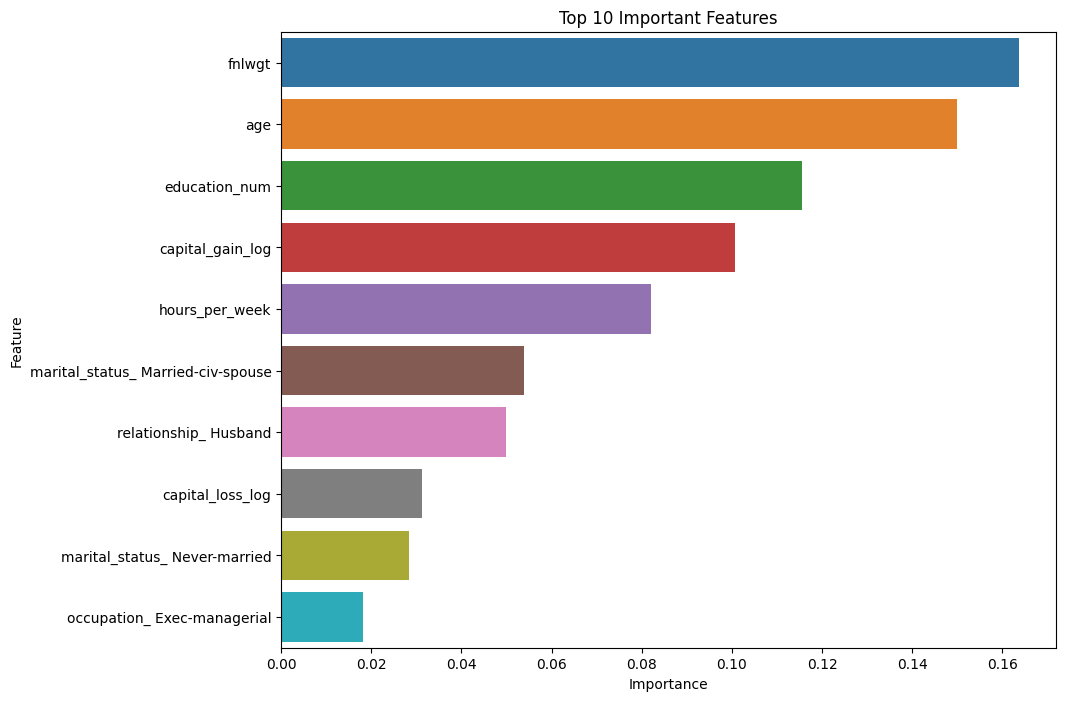

In [10]:
# Step 1: Feature Importance
import matplotlib.pyplot as plt

# Extract feature importances and pair them with column names
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()



In [11]:
# Proceed to Step 2: Hyperparameter Tuning
# For demonstration, we'll adjust 'n_estimators' and 'max_depth'
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 20, 'n_estimators': 100}, 0.862715230503737)

In [12]:
from sklearn.model_selection import cross_val_score, GridSearchCV
cv_scores = cross_val_score(RandomForestClassifier(**best_params, random_state=42), X, y, cv=5)

# Output the mean and standard deviation of the cross-validation scores
print(f"CV Scores Mean: {cv_scores.mean()}")
print(f"CV Scores Std: {cv_scores.std()}")


CV Scores Mean: 0.8647155179340809
CV Scores Std: 0.0025937511451709742


In [14]:
# Load the validation dataset
validation_path = 'census+income/adult.test'
validation_data = pd.read_csv(validation_path, skiprows=1, names=column_names)

In [15]:
validation_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [13]:
 # Skipping the first row which is a header row not present in the training set

# Apply the same preprocessing steps

# Drop the 'education' column as before
validation_data_cleaned = validation_data.drop('education', axis=1)

# Encode categorical variables
validation_encoded = pd.get_dummies(validation_data_cleaned, columns=[
    'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex'
])

# Handle 'native_country' as we did before, grouping less frequent countries
validation_encoded['native_country'] = validation_encoded['native_country'].apply(
    lambda x: "Other" if validation_encoded['native_country'].value_counts()[x] < 100 else x
)
validation_final = pd.get_dummies(validation_encoded, columns=['native_country'], drop_first=True)

# Ensuring all columns in the validation set match those in the training set
# Adding missing columns with 0 value
for col in set(X.columns) - set(validation_final.columns):
    validation_final[col] = 0

# Aligning the order of columns in validation set to match the training set
validation_final = validation_final[X.columns]

# Apply log transformation to 'capital_gain' and 'capital_loss'
validation_final['capital_gain_log'] = np.log(validation_final['capital_gain'] + 1)
validation_final['capital_loss_log'] = np.log(validation_final['capital_loss'] + 1)
validation_final.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

# Scale the numerical features
validation_final[numerical_columns] = scaler.transform(validation_final[numerical_columns])

# Ensure the validation set is prepared correctly
validation_final.head(), validation_final.shape


KeyError: 'capital_gain'

In [ ]:
# Assuming `rf_model` is your trained RandomForestClassifier
predictions = rf_model.predict(validation_final)


In [21]:
rf_model.score(validation_final,predictions)

1.0